# Self formulation of simple linear regression

In [30]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model

In [31]:
class SLR:
    def __init__(self):
        self.m=0
        self.b=0
        
    
    def fit(self, X_train, Y_train):
        num = 0
        deno = 0
        for i in range(0, X_train.shape[0]):
            num = num + (Y_train[i] - Y_train.mean())*(X_train[i] - X_train.mean())
            deno = deno + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())

        self.m = num/deno
        self.b = Y_train.mean() - self.m*X_train.mean()

        return self.m, self.b
    def predict(self, X_test):
        return self.b + self.m*X_test

In [32]:
df = pd.read_csv(r'C:\Users\harib\OneDrive\Documents\Python Scripts\Statistics\Regression\Simple linear Regression\placement_2Var.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [33]:
x = df.iloc[:,0].values
y = df.iloc[:,-1].values

x, y

(array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
        6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
        6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
        6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
        5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
        8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
        5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
        8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
        4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
        6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
        8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
        6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
        5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
        4.85, 6.17, 5.84, 6.07, 5.66, 

## Training data 

### Spliting data for training and testing

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test

(array([7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
        7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
        5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
        7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
        6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
        7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
        6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
        6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
        5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
        7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
        7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
        8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
        6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
        6.06, 7.57, 8.1 , 9.16, 5.84, 

In [35]:
lr = SLR()
lr2 = SLR()

In [36]:
X_train.shape

(160,)

In [37]:
lr.fit(X_train, y_train)

(0.5579519734250721, -0.8961119222429152)

In [38]:
X_test

array([8.58, 7.15, 5.88, 6.22, 4.57, 4.79, 5.32, 6.86, 8.35, 6.87, 8.94,
       7.9 , 6.93, 5.91, 7.32, 7.82, 5.09, 7.42, 6.94, 7.73, 6.19, 7.28,
       6.73, 7.2 , 8.21, 6.75, 7.87, 7.6 , 8.63, 5.12, 8.15, 7.36, 8.31,
       6.6 , 6.59, 7.47, 7.93, 6.29, 6.37, 6.47])

In [39]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [40]:
predicted = lr.predict(X_test)
predicted

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

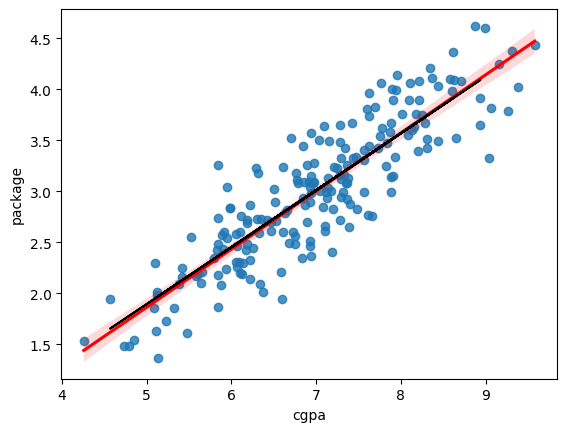

In [41]:
# plt.scatter(x, y)
sns.regplot(x='cgpa', y='package', data=df, line_kws={"color":'red'})
plt.plot(X_test, predicted, color='black')
plt.show()

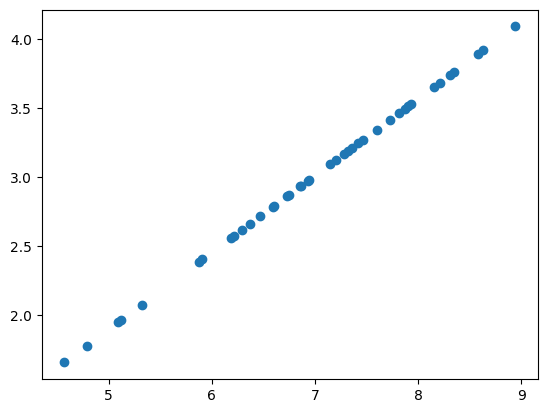

In [42]:
plt.scatter(X_test, predicted)
plt.show()

# Regression Matric

In [43]:
y_pred = lr.predict(X_test)

In [44]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [45]:
mean_squared_error(y_test, y_pred)

0.12129235313495523

In [46]:
mean_absolute_error(y_test, y_pred)

0.2884710931878174

In [47]:
r2 = r2_score(y_test, y_pred)
r2

0.7807301475103842

In [48]:
X_test.shape


(40,)

In [49]:
n = 40
p = 1

adj_r2 = 1-(((1-r2)/(n-p-1))*(n-1))
adj_r2

0.7749598882343416

In [50]:
df3 = pd.read_csv(r'C:\Users\harib\OneDrive\Documents\Python Scripts\Statistics\Regression\Simple linear Regression\placement.csv')
df3.drop(df3.columns[0],axis=1, inplace=True)
col_iq = df3.iloc[:,1]
col_iq = col_iq.values/100
col_iq

array([1.23, 1.06, 1.21, 1.32, 1.42, 0.48, 1.43, 0.63, 1.56, 0.66, 0.45,
       1.38, 1.39, 1.16, 1.03, 1.76, 2.24, 1.83, 1.  , 1.32, 1.2 , 1.51,
       1.2 , 0.87, 1.21, 0.91, 1.99, 1.24, 0.9 , 1.12, 1.28, 1.09, 1.39,
       1.49, 1.63, 0.9 , 1.4 , 1.49, 1.6 , 1.46, 1.34, 1.14, 0.89, 1.41,
       0.61, 0.66, 1.14, 1.61, 1.38, 1.35, 2.33, 1.41, 1.75, 1.68, 1.41,
       1.14, 0.65, 1.3 , 0.79, 1.12, 1.39, 1.37, 1.02, 1.28, 0.64, 1.66,
       0.96, 1.18, 0.75, 1.2 , 1.27, 1.32, 1.16, 0.61, 1.54, 1.69, 1.55,
       0.5 , 0.81, 0.9 , 1.96, 1.07, 0.37, 1.3 , 1.69, 1.66, 1.28, 1.32,
       1.49, 1.51, 0.86, 1.58, 1.1 , 1.12, 0.52, 2.  , 0.42, 1.82, 1.03,
       1.13])

In [51]:
df2 = df.copy()
df2['iq'] = df2['package'] + (np.random.randint(-12,12,200)/10)
df2
df2 = df2[['cgpa','iq','package']]
df2

,cgpa,iq,package
0,6.89,2.96,3.26
1,5.12,1.98,1.98
2,7.82,2.45,3.25
3,7.42,4.67,3.67
4,6.94,4.07,3.57
...,...,...,...
195,6.93,2.36,2.46
196,5.89,2.37,2.57
197,7.21,3.44,3.24
198,7.63,4.06,3.96


In [52]:
x1 = df2.iloc[:,0:2]
y1 = df2.iloc[:,-1]

x1, y1

(     cgpa    iq
 0    6.89  2.96
 1    5.12  1.98
 2    7.82  2.45
 3    7.42  4.67
 4    6.94  4.07
 ..    ...   ...
 195  6.93  2.36
 196  5.89  2.37
 197  7.21  3.44
 198  7.63  4.06
 199  6.22  2.33
 
 [200 rows x 2 columns],
 0      3.26
 1      1.98
 2      3.25
 3      3.67
 4      3.57
        ... 
 195    2.46
 196    2.57
 197    3.24
 198    3.96
 199    2.33
 Name: package, Length: 200, dtype: float64)

In [53]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=2)
X1_train, X1_test, y1_train, y1_test

(     cgpa    iq
 137  7.14  2.03
 163  8.93  2.71
 111  5.42  3.25
 123  5.10  2.80
 109  7.77  4.26
 ..    ...   ...
 43   7.66  3.36
 22   6.14  3.40
 72   7.78  3.22
 15   7.25  2.43
 168  8.65  2.72
 
 [160 rows x 2 columns],
      cgpa    iq
 112  8.58  3.40
 29   7.15  3.39
 182  5.88  1.08
 199  6.22  2.33
 193  4.57  2.64
 85   4.79  0.48
 10   5.32  2.06
 54   6.86  3.49
 115  8.35  4.01
 35   6.87  3.37
 12   8.94  2.45
 92   7.90  3.20
 13   6.93  3.09
 126  5.91  3.20
 174  7.32  3.19
 2    7.82  2.45
 44   5.09  1.86
 3    7.42  4.67
 113  6.94  2.27
 14   7.73  3.92
 23   6.19  3.18
 25   7.28  3.75
 6    6.73  1.50
 134  7.20  2.43
 165  8.21  3.38
 173  6.75  1.66
 45   7.87  3.18
 65   7.60  4.81
 48   8.63  5.19
 122  5.12  2.21
 178  8.15  3.43
 64   7.36  2.52
 9    8.31  3.11
 57   6.60  2.34
 78   6.59  2.51
 71   7.47  4.44
 128  7.93  2.44
 176  6.29  3.03
 131  6.37  1.81
 53   6.47  2.21,
 137    3.13
 163    3.91
 111    2.25
 123    2.30
 109    4.06
      

In [54]:
lr1 = LinearRegression() 
lr1.fit(X1_train, y1_train)

LinearRegression()

In [55]:
pred = lr1.predict(X1_test)
pred

array([3.83542242, 3.15516142, 2.15206836, 2.53010914, 1.80093774,
       1.53084718, 2.05625406, 3.03489499, 3.83204441, 3.01883552,
       3.84153891, 3.47809206, 2.99876158, 2.53384778, 3.20115149,
       3.31010493, 1.91244628, 3.50518867, 2.86134306, 3.52225444,
       2.66323887, 3.27925895, 2.62820422, 3.01245087, 3.65639201,
       2.66543333, 3.46038982, 3.61486951, 4.1694796 , 1.98736065,
       3.63659084, 3.10397332, 3.65703155, 2.71215079, 2.73687876,
       3.48903828, 3.36056564, 2.68468282, 2.51113089, 2.62792838])

In [56]:
r2_ = r2_score(y1_test, pred)
r2_

0.8613990602319385

In [57]:
X1_test.shape

(40, 2)

In [58]:
n = 40
p = 2

adj_r2 = 1-(((1-r2)/(n-p-1))*(n-1))
adj_r2

0.768877723051486